In [1]:
# load libraries
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(patchwork)))
# import ggplot theme
source("../../utils/figure_themes.r")

In [2]:
# path to the anova data
non_aggregated_anova_genotype_df_path <- file.path("..","..","data","6.analysis_results","non_aggregated_anova_results.parquet")
non_aggregated_data_path <- file.path("..","..","data","5.converted_data","non_aggregated_data.parquet")
fig_path <- file.path("..","figures","non_aggregated")
# create the figure directory if it does not exist
if (!dir.exists(fig_path)){
  dir.create(fig_path, recursive = TRUE)
}

# read the data
non_aggregated_data_df <- arrow::read_parquet(non_aggregated_data_path)
head(non_aggregated_data_df)

# read the anova data
non_aggregated_anova_df <- arrow::read_parquet(non_aggregated_anova_genotype_df_path)


Metadata_Image_FileName_OP,Metadata_ObjectNumber,Metadata_Object_ConvertImageToObjects_Number_Object_Number,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxArea,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_Y,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_Y,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_X_OP,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_Y_OP,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MAX_high_10_L.tiff,1,1,38250,269,182,44,12,131.5461,118.6411,⋯,0.8414748,0.8345736,1.14918564,1.1522001,1.07890507,1.14484796,1.04000878,1.02573996,1.04549223,1.02761705
MAX_high_10_R.tiff,1,1,34170,208,245,38,44,106.9621,162.3042,⋯,0.4524796,0.4361385,0.11217819,0.1319819,0.10860250,0.12569959,0.07571690,0.07120688,0.07647711,0.06792193
MAX_high_11_L.tiff,1,1,41736,250,267,62,45,131.3598,159.4445,⋯,0.4948130,0.4908441,-0.01613966,0.0010415,-0.02199706,-0.02099207,-0.03393425,-0.04263493,-0.03498345,-0.03876252
MAX_high_11_R.tiff,1,1,43616,212,272,24,40,101.0699,185.4864,⋯,0.8787288,0.8656168,1.12090459,1.1406044,1.07452904,1.11794134,1.03158516,1.01517198,1.03514983,1.01918842
MAX_high_12_L.tiff,2,2,25894,283,155,69,34,164.5791,105.2665,⋯,0.4767676,0.4826737,0.17788587,0.1479330,0.10331342,0.15645695,0.11176513,0.10784585,0.11761376,0.10885888
MAX_high_12_R.tiff,1,1,40920,229,265,43,45,119.3891,173.5103,⋯,0.1422418,0.1351928,-0.28744321,-0.2676854,-0.30011318,-0.29231741,-0.31932910,-0.32658057,-0.31978483,-0.32240245


## Genotype, side and identity level data

### ANOVA means

In [3]:

non_aggregated_anova_df$log10_anova_p_value <- -log10(non_aggregated_anova_df$anova_p_value)
# order the results by log10 anova p-value
non_aggregated_anova_df <- non_aggregated_anova_df %>% arrange(log10_anova_p_value)
# split the feature into 3 groups at "_"
non_aggregated_anova_df$feature_type <- sapply(strsplit(non_aggregated_anova_df$feature, "_"), function(x) x[1])
non_aggregated_anova_df$feature_name <- sapply(strsplit(non_aggregated_anova_df$feature, "_"), function(x) x[2])
head(non_aggregated_anova_df)


group1,group2,meandiff,p-adj,lower,upper,reject,feature,anova_p_value,log10_anova_p_value,feature_type,feature_name
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
high,unsel,0.0425,0.9824,-0.5191,0.6042,FALSE,RadialDistribution_ZernikePhase_OP_7_5,0.9593022,0.01804454,RadialDistribution,ZernikePhase
high,wt,0.0674,0.9553,-0.4872,0.6220,FALSE,RadialDistribution_ZernikePhase_OP_7_5,0.9593022,0.01804454,RadialDistribution,ZernikePhase
unsel,wt,0.0249,0.9910,-0.4366,0.4863,FALSE,RadialDistribution_ZernikePhase_OP_7_5,0.9593022,0.01804454,RadialDistribution,ZernikePhase
high,unsel,0.0094,0.9991,-0.5519,0.5708,FALSE,AreaShape_CentralMoment_1_0,0.8963440,0.04752526,AreaShape,CentralMoment
high,wt,0.0882,0.9246,-0.4661,0.6425,FALSE,AreaShape_CentralMoment_1_0,0.8963440,0.04752526,AreaShape,CentralMoment
unsel,wt,0.0788,0.9137,-0.3824,0.5400,FALSE,AreaShape_CentralMoment_1_0,0.8963440,0.04752526,AreaShape,CentralMoment


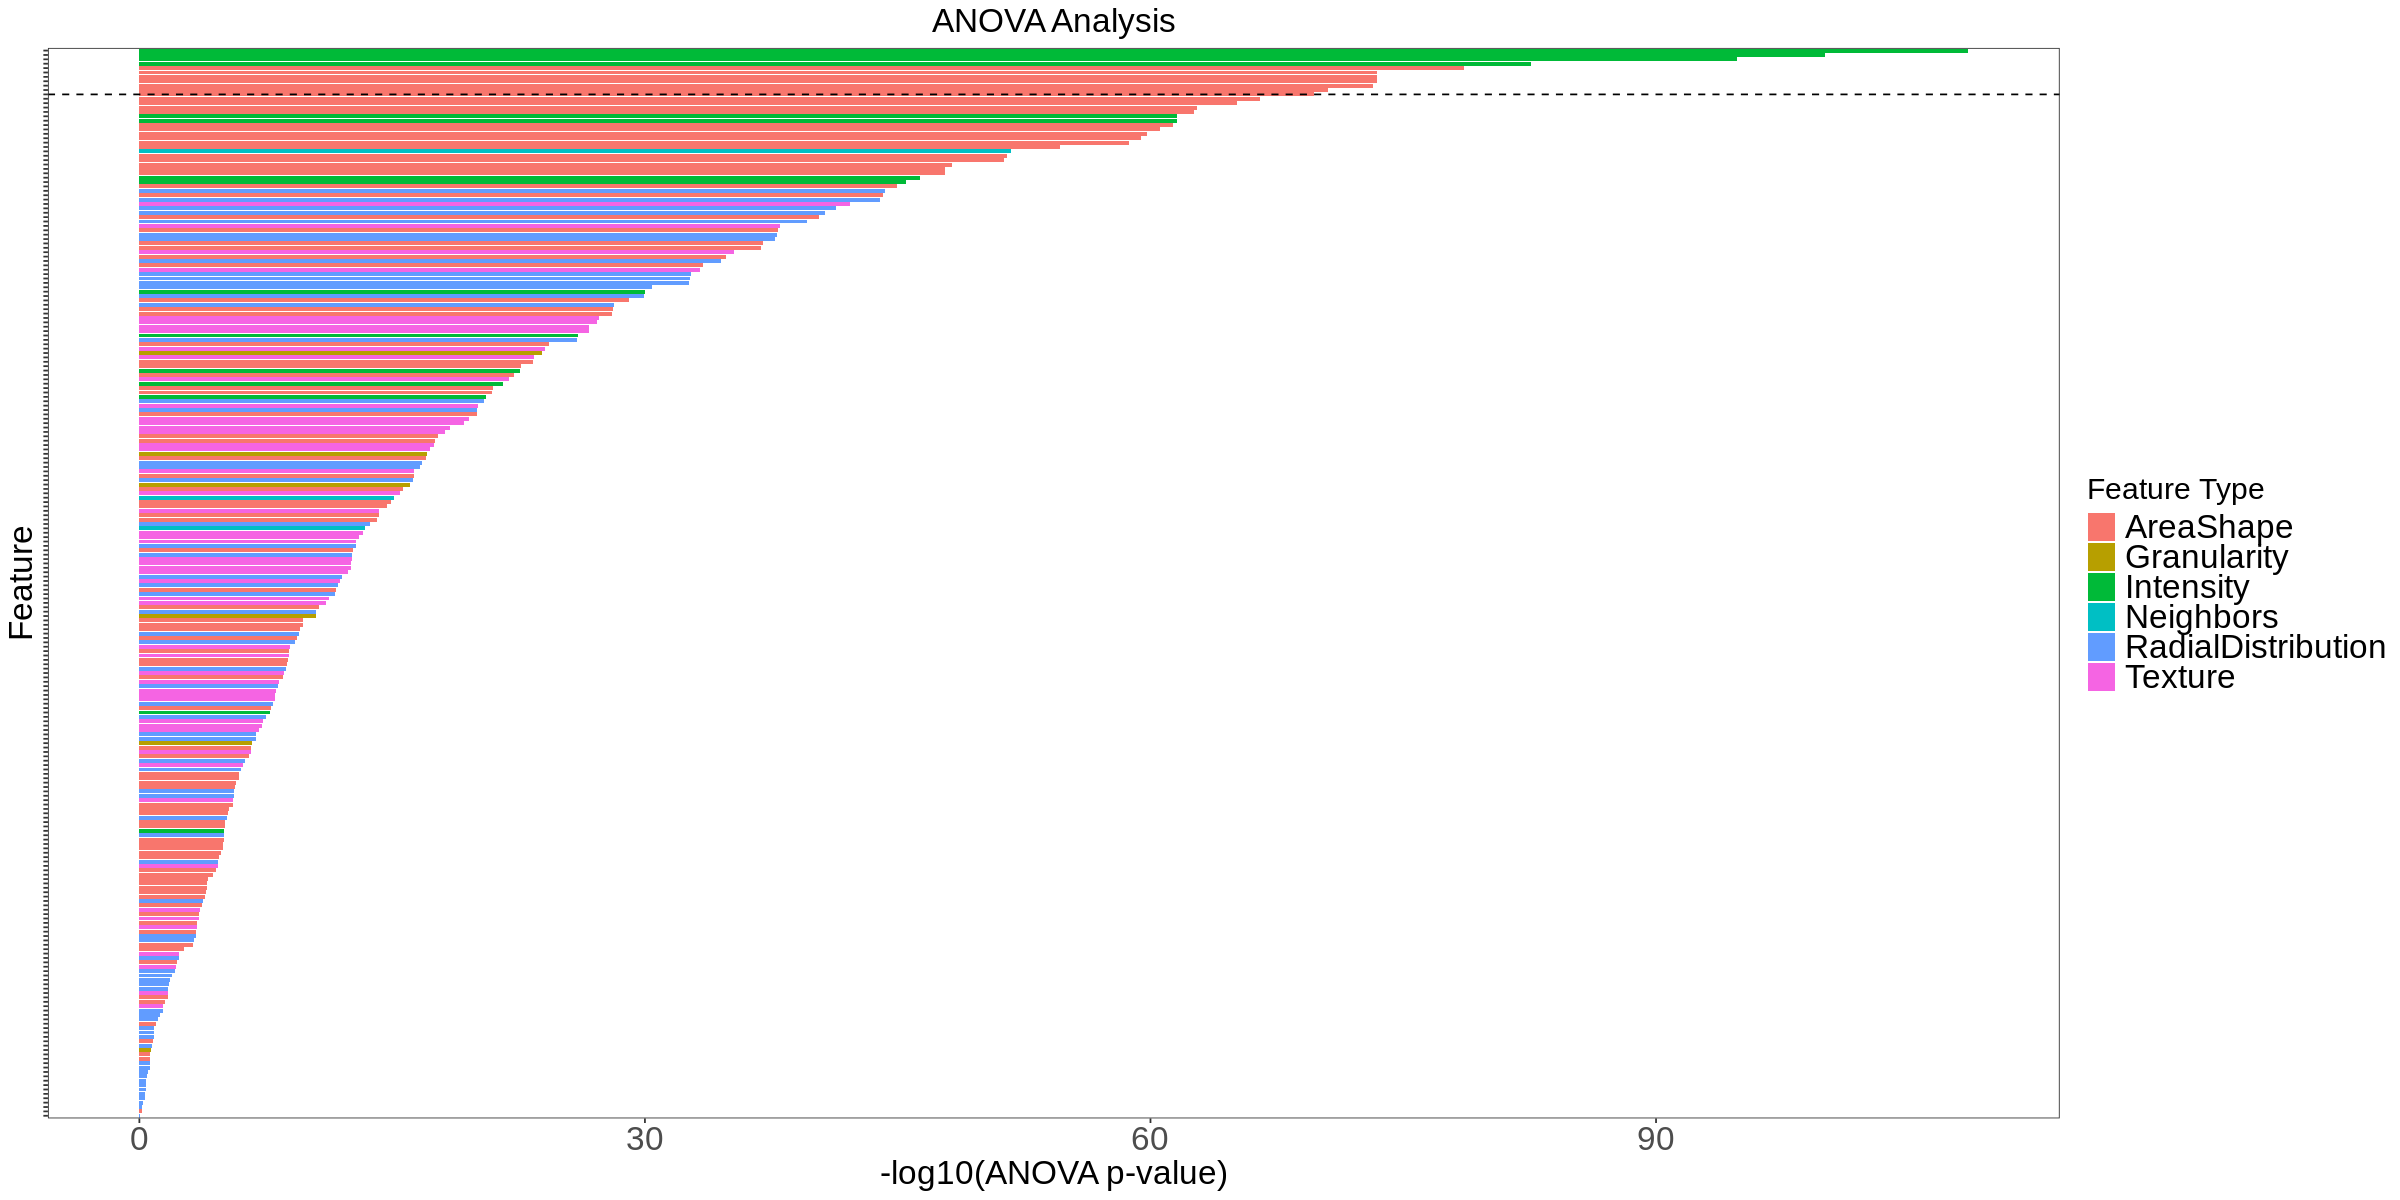

In [4]:
width <- 20
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
anova_plot <- (
    # order the results by log10 anova p-value
    ggplot(non_aggregated_anova_df, aes(y = reorder(feature, log10_anova_p_value), x = log10_anova_p_value, fill = feature_type))
    + geom_bar(stat = "identity")
    # drop y axis labels
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + labs(title = "ANOVA Analysis", y = "Feature", x = "-log10(ANOVA p-value)", fill = "Feature Type")
   
    + figure_theme


    + theme(axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())
    + theme(axis.text.y = element_blank())
    + geom_hline(yintercept = length(unique(non_aggregated_anova_df$feature))-10, linetype = "dashed", color = "black")
     
)
anova_plot
# save the plot
ggsave(file = "non_aggregatednova_plot.png", plot = anova_plot, path = file.path(fig_path), width = width, height = height, dpi = 600)

## Test for equality of variance 

In [5]:
# load levene data in 
non_aggregated_levene_df_path <- file.path("..","..","data","6.analysis_results","non_aggregated_levene_test_results.csv")
non_aggregated_levene_df <- read.csv(non_aggregated_levene_df_path)
head(non_aggregated_levene_df)

,X,feature,levene_statistic,levene_p_value,group
,<int>,<chr>,<dbl>,<dbl>,<chr>
1,427,RadialDistribution_ZernikePhase_OP_8_2,9.215577e-05,0.9923639,high_vs_wt
2,439,Texture_AngularSecondMoment_OP_3_03_256,6.200963e-04,0.9801938,high_vs_wt
3,148,RadialDistribution_ZernikeMagnitude_OP_6_4,6.497006e-04,0.9797298,high_vs_unsel
4,142,RadialDistribution_ZernikeMagnitude_OP_4_4,7.542741e-04,0.9781598,high_vs_unsel
5,557,AreaShape_Zernike_1_1,7.959461e-04,0.9775457,unsel_vs_wt
6,273,AreaShape_InertiaTensor_0_0,8.132388e-04,0.9773188,high_vs_wt


### Variances

In [6]:
width <- 4
height <- 4
options(repr.plot.width = width, repr.plot.height = height)
# make a new column for the group1 and group2
non_aggregated_anova_df$comparison <- paste(non_aggregated_anova_df$group1, non_aggregated_anova_df$group2, sep = " - ")

# order the results by anova p-value
non_aggregated_anova_df <- non_aggregated_anova_df %>% arrange(anova_p_value)
features <- unique(non_aggregated_anova_df$feature)[1:20]
features
top_20_non_aggregated_anova_df <- non_aggregated_anova_df %>% filter(feature %in% features)
top_20_non_aggregated_anova_df$log10_tukey_p_value <- -log10(top_20_non_aggregated_anova_df$`p-adj`)
# make the genotype a factor
# replace the genotype values
non_aggregated_data_df$Metadata_genotype <- gsub("wt", "Wild Type", non_aggregated_data_df$Metadata_genotype)
non_aggregated_data_df$Metadata_genotype <- gsub("unsel", "Mid-Severity", non_aggregated_data_df$Metadata_genotype)
non_aggregated_data_df$Metadata_genotype <- gsub("high", "High-Severity", non_aggregated_data_df$Metadata_genotype)
non_aggregated_data_df$Metadata_genotype <- factor(
    non_aggregated_data_df$Metadata_genotype, 
    levels = c("Wild Type", "Mid-Severity", "High-Severity")
)
head(non_aggregated_data_df)

[1] "Intensity_MeanIntensityEdge_OP"      
 [2] "Intensity_MaxIntensityEdge_OP"       
 [3] "Intensity_StdIntensityEdge_OP"       
 [4] "Intensity_LowerQuartileIntensity_OP" 
 [5] "AreaShape_Zernike_2_0"               
 [6] "AreaShape_Area"                      
 [7] "AreaShape_CentralMoment_0_0"         
 [8] "AreaShape_SpatialMoment_0_0"         
 [9] "AreaShape_MedianRadius"              
[10] "AreaShape_SpatialMoment_1_0"         
[11] "AreaShape_ConvexArea"                
[12] "AreaShape_MeanRadius"                
[13] "AreaShape_EquivalentDiameter"        
[14] "AreaShape_InertiaTensorEigenvalues_1"
[15] "AreaShape_SpatialMoment_2_0"         
[16] "Intensity_MinIntensityEdge_OP"       
[17] "Intensity_MinIntensity_OP"           
[18] "AreaShape_SpatialMoment_0_1"         
[19] "AreaShape_MinorAxisLength"           
[20] "AreaShape_SpatialMoment_1_1"

Metadata_Image_FileName_OP,Metadata_ObjectNumber,Metadata_Object_ConvertImageToObjects_Number_Object_Number,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxArea,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_Y,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_Y,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_X_OP,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_Y_OP,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MAX_high_10_L.tiff,1,1,38250,269,182,44,12,131.5461,118.6411,⋯,0.8414748,0.8345736,1.14918564,1.1522001,1.07890507,1.14484796,1.04000878,1.02573996,1.04549223,1.02761705
MAX_high_10_R.tiff,1,1,34170,208,245,38,44,106.9621,162.3042,⋯,0.4524796,0.4361385,0.11217819,0.1319819,0.10860250,0.12569959,0.07571690,0.07120688,0.07647711,0.06792193
MAX_high_11_L.tiff,1,1,41736,250,267,62,45,131.3598,159.4445,⋯,0.4948130,0.4908441,-0.01613966,0.0010415,-0.02199706,-0.02099207,-0.03393425,-0.04263493,-0.03498345,-0.03876252
MAX_high_11_R.tiff,1,1,43616,212,272,24,40,101.0699,185.4864,⋯,0.8787288,0.8656168,1.12090459,1.1406044,1.07452904,1.11794134,1.03158516,1.01517198,1.03514983,1.01918842
MAX_high_12_L.tiff,2,2,25894,283,155,69,34,164.5791,105.2665,⋯,0.4767676,0.4826737,0.17788587,0.1479330,0.10331342,0.15645695,0.11176513,0.10784585,0.11761376,0.10885888
MAX_high_12_R.tiff,1,1,40920,229,265,43,45,119.3891,173.5103,⋯,0.1422418,0.1351928,-0.28744321,-0.2676854,-0.30011318,-0.29231741,-0.31932910,-0.32658057,-0.31978483,-0.32240245


In [7]:
width <- 8
height <- 8

list_of_genotype_anova_plots_by_genotype <- list()

for (i in 1:length(features)){
    print(features[i])
    # get the top feature
    tmp <- non_aggregated_data_df %>% select(c("Metadata_genotype", features[i]))
    # aggregate the data to get the mean and standard deviation of the top feature
    tmp <- tmp %>% group_by(Metadata_genotype) %>% summarise(mean = mean(!!as.name(features[i])), sd = sd(!!as.name(features[i])))
    # calculate the variance where variance = sd^2
    tmp$variance <- tmp$sd^2
    title <- gsub("_", " ", features[i])
    # plot the variability of the top feature
    var_plot <- (
        ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_genotype)) 
        + geom_bar(stat = "identity")
        + theme(axis.text.x = element_text(angle = 90, hjust = 1))
        + labs(title = title, x = "Genotype", y = "Variance", fill = "Genotype")
        + theme_bw()
        + figure_theme
    )
    # save var plot
    ggsave(file = paste0("non_aggregated_", features[i], "_variance_plot_genotype.png"), plot = var_plot, path = file.path(fig_path), width = width, height = height, dpi = 600)

    list_of_genotype_anova_plots_by_genotype[[i]] <- var_plot
}

[1] "Intensity_MeanIntensityEdge_OP"
[1] "Intensity_MaxIntensityEdge_OP"
[1] "Intensity_StdIntensityEdge_OP"
[1] "Intensity_LowerQuartileIntensity_OP"
[1] "AreaShape_Zernike_2_0"
[1] "AreaShape_Area"
[1] "AreaShape_CentralMoment_0_0"
[1] "AreaShape_SpatialMoment_0_0"
[1] "AreaShape_MedianRadius"
[1] "AreaShape_SpatialMoment_1_0"
[1] "AreaShape_ConvexArea"
[1] "AreaShape_MeanRadius"
[1] "AreaShape_EquivalentDiameter"
[1] "AreaShape_InertiaTensorEigenvalues_1"
[1] "AreaShape_SpatialMoment_2_0"
[1] "Intensity_MinIntensityEdge_OP"
[1] "Intensity_MinIntensity_OP"
[1] "AreaShape_SpatialMoment_0_1"
[1] "AreaShape_MinorAxisLength"
[1] "AreaShape_SpatialMoment_1_1"
